<a href="https://colab.research.google.com/github/Chegevar999/-CS-lis-skins/blob/main/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

100%|██████████| 37.3M/37.3M [00:00<00:00, 113MB/s]

Extracting files...


📂 Путь к датасету: /root/.cache/kagglehub/datasets/amulyas/311-service-requests-boston-2024/versions/2
✅ Используем файл: tmpm461rr5o.csv

🔹 Размер датасета: 282,836 строк × 30 колонок

🔹 Первые строки:
   case_enquiry_id              open_dt        sla_target_dt  \
0     101005463183  2024-05-14 13:33:28  2024-05-17 04:30:00   
1     101005463184  2024-05-14 13:33:53  2024-07-22 04:30:00   
2     101005837387  2024-12-31 02:11:57  2025-01-01 03:30:00   
3     101005287893  2024-02-07 04:01:41  2024-02-09 04:01:43   
4     101005331785  2024-02-28 08:06:00  2024-02-29 08:06:25   

             closed_dt  on_time case_status  \
0  2024-05-15 02:58:54   ONTIME      Closed   
1  2024-05-24 12:34:37   ONTIME      Closed   
2                  NaN  OVERDUE        Open   
3  2024-02-07 05:48:33   ONTIME      Closed   
4  2024-03-04 09:07:57  OVERDUE      Closed   

                                      closure_reason  \
0  Case Closed. Closed date : Wed May 15 06:58:54...   
1  Case Closed. C

/tmp/ipython-input-1765116195.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_complaints.values, y=top_complaints.index, palette="Blues_r")


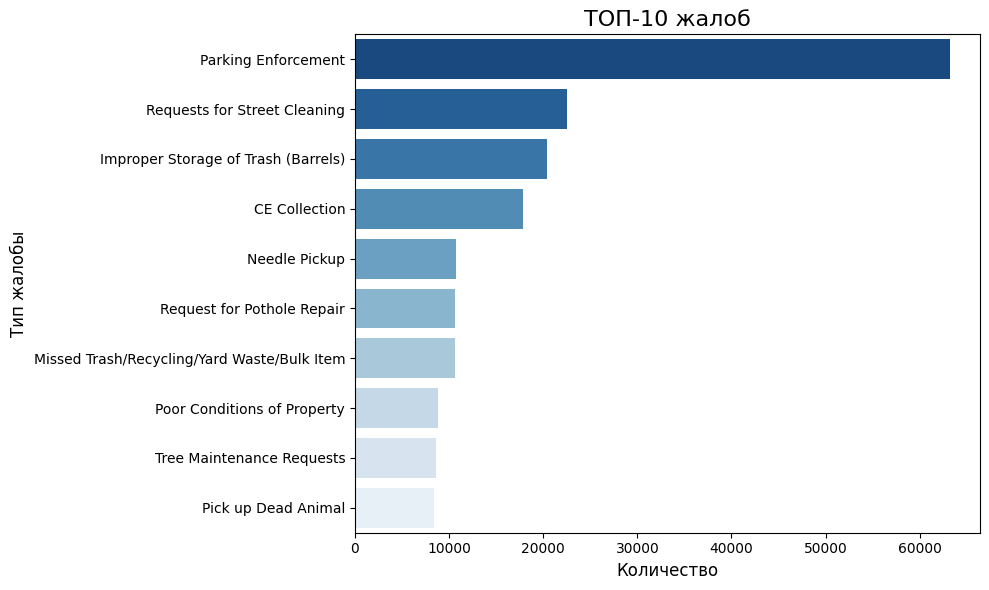


📍 ТОП жалоб по city_council_district:
city_council_district  type                                       
                       General Comments For a Program or Policy       1529
                       Ground Maintenance                              219
                       Park Improvement Requests                       195
                       Equipment Repair                                178
                       General Comments For An Employee                154
                       State/Cass Shelter Sites                        132
                       Parks Lighting/Electrical Issues                112
                       Missed Trash/Recycling/Yard Waste/Bulk Item      30
                       Cemetery Maintenance Request                     29
                       General Traffic Engineering Request              14
                       Tree Maintenance Requests                         9
                       Parking Enforcement                           

In [1]:
import pandas as pd
import kagglehub
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

# Функция поиска колонки по ключевым словам
def find_column(columns, keywords):
    for col in columns:
        if any(kw in col.lower() for kw in keywords):
            return col
    return None

# 1. Скачиваем датасет
path = Path(kagglehub.dataset_download("amulyas/311-service-requests-boston-2024"))
print("📂 Путь к датасету:", path)

# 2. Ищем CSV-файл
csv_files = list(path.glob("*.csv"))
if not csv_files:
    raise FileNotFoundError("❌ CSV файл не найден в датасете")
csv_file = csv_files[0]
print("✅ Используем файл:", csv_file.name)

# 3. Загружаем данные
df = pd.read_csv(csv_file)
print(f"\n🔹 Размер датасета: {df.shape[0]:,} строк × {df.shape[1]} колонок\n")

print("🔹 Первые строки:")
print(df.head(), "\n")

print("🔹 Информация о колонках:")
print(df.info(), "\n")

# 4. Ищем колонку с жалобами
complaint_column = find_column(df.columns, ["complaint", "type"])
if not complaint_column:
    raise ValueError("❌ Колонка с жалобами не найдена!")
print(f"✅ Используем колонку для жалоб: {complaint_column}")

# 5. ТОП-10 жалоб
top_complaints = df[complaint_column].value_counts().head(10)
print("\n📊 ТОП-10 жалоб:")
print(top_complaints)

# 6. Визуализация TOP-10
plt.figure(figsize=(10,6))
sns.barplot(x=top_complaints.values, y=top_complaints.index, palette="Blues_r")
plt.title("ТОП-10 жалоб", fontsize=16)
plt.xlabel("Количество", fontsize=12)
plt.ylabel("Тип жалобы", fontsize=12)
plt.tight_layout()
plt.show()

# 7. ТОП жалоб по районам (если есть колонка)
borough_column = find_column(df.columns, ["borough", "city", "neighborhood"])
if borough_column:
    print(f"\n📍 ТОП жалоб по {borough_column}:")
    borough_complaints = df.groupby(borough_column)[complaint_column].value_counts().head(20)
    print(borough_complaints)
else:
    print("\n⚠️ Колонка с районами/городом не найдена, пропускаем группировку.")
